# Famous restaurant data which provides food of 5 different origins

### Data discription:
Data contains the different data related to the food order i restuarant.   

### Data columns:
User ID: User ID of customers                                                                                           
Area code: Area code of customers residence.                                                               
Location: Area and the city of residence of customer.                                                                   
Gender: Gender of customer                                                                                         
YOB: Year when customer was born                                                                                      
Marital Status: Marital status                                                                                        
Activity: Customers career status whether student or professional                                                          
Budget: Budget they may spend in the restaurant                                                                 
Cuisines: Cuisine they preferred/liked the most to have at restaurant                                             
Alcohol: Alcohol intake frequency   

### We will start by importing python libraries and reading the dataset.

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df= pd.read_csv('Cuisine_rating.csv')

In [3]:
df.head() 

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Shape of dataset

In [4]:
df.shape

(200, 15)

### Summary of Dataset

In [5]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


### Check Datatype of dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

### Dropping columns which are not usefull for EDA

In [8]:
df.drop(df.columns[[0]],axis = 1, inplace=True)

In [9]:
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [10]:
df.shape

(200, 14)

### Checking for null values in Dataset

In [11]:
df.isnull().sum()

Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

### Checking for any duplicates in Dataset and droping them

In [12]:
df.duplicated().value_counts()

False    199
True       1
dtype: int64

In [13]:
df1=df.drop_duplicates()

In [14]:
df1.duplicated().value_counts()

False    199
dtype: int64

### Exploring Data

In [15]:
numerical_features= [features for features in df.columns if df[features].dtypes != 'O']
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))



We have 6 numerical features: ['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']
We have 8 categorical features: ['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S']


### Checking the number of unique values in each of the columns

In [16]:
df1.nunique()

Area code         65
Location          10
Gender             2
YOB               46
Marital Status     3
Activity           2
Budget             5
Cuisines           7
Alcohol            3
Smoker             3
Food Rating        5
Service Rating     5
Overall Rating     9
Often A S          2
dtype: int64

### Checking the correlation between the columns of dataset

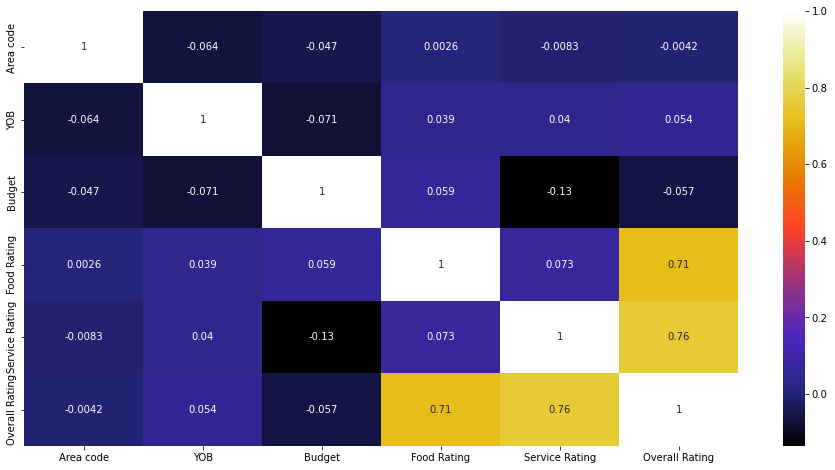

In [17]:
plt.figure(figsize = (16,8))
sns.heatmap(data=df1.corr(),cmap='CMRmap',annot=True)
plt.show()

## Visualization

### Checking the most rated food in cuisines.

In [18]:
Toprated_cuisines= df1.groupby('Cuisines')['Food Rating'].sum().sort_values(ascending= False)

In [19]:
Toprated_cuisines

Cuisines
Japanese    139
French      110
Filipino     92
Indian       89
Chinese      83
Seafood      71
Italian      58
Name: Food Rating, dtype: int64

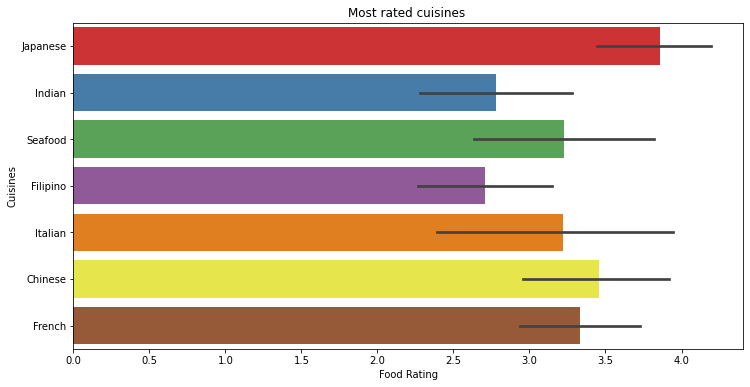

In [20]:
plt.figure(figsize=(12,6))
plt.title('Most rated cuisines ')

sns.barplot(x='Food Rating', y = 'Cuisines',data = df1, palette = 'Set1')
plt.show()

##### The above graph shows that the most rated cuisine is japanese followed by french and chinese

### Getting an overview of each categorical column

C:\Users\NANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-p

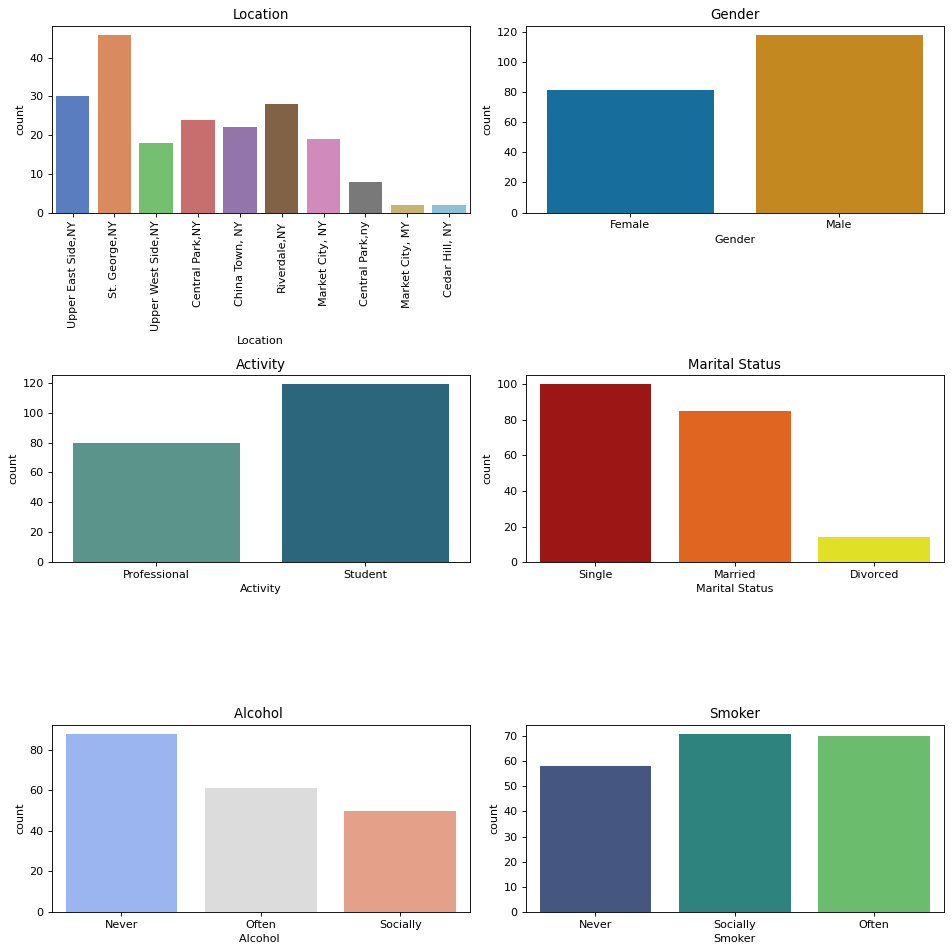

In [21]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(3,2,1)
plt.title('Location')
plt.xticks(rotation=90)
sns.countplot(x='Location',data=df1,palette='muted')

#plt.subplot(4,2,3)
#plt.title('Age')
#sns.countplot(x='Age',data=df1,palette='rocket')

plt.subplot(3,2,2)
plt.title('Gender')
sns.countplot(df1['Gender'],palette='colorblind')

plt.subplot(3,2,3)
plt.title('Activity')
sns.countplot(df1['Activity'],palette='crest')

plt.subplot(3,2,5)
plt.title('Alcohol ')
sns.countplot(df1['Alcohol '],palette='coolwarm')

plt.subplot(3,2,4)
plt.title('Marital Status')
sns.countplot(df1['Marital Status'],palette='hot')

#ax=plt.subplot(3,2,5)
#plt.title('Alcohol')
#ax.set_ylim(0,0.00015)
#ax.set_xlim(0,26000)
#sns.kdeplot(df1['Alcohol'])

plt.subplot(3,2,6)
plt.title('Smoker')
sns.countplot(df1['Smoker'],palette='viridis')

plt.tight_layout()
plt.show()

In [22]:
df['Location'].value_counts()

St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: Location, dtype: int64

##### Location:-
-Location graph shows that most number of restuarant from different locations.                                                                    
-St. George,NY has the highest number of resturant with 40+ restuarant followed by Upper East Side,NY and Riverdale,NY with 30,28 restuarant respectively




##### Gender:-
 -Gender graph shows that male cutomers tends to go to the restuarants more often then females.                                       
 -Male count:120                                                                                                                
 -female count:80


##### Activity & Marital status:-
-Most of the customer who visit restuarants more often are students and who are single, divorce seems to be exceptonal.


### Most rated cusines based on gender

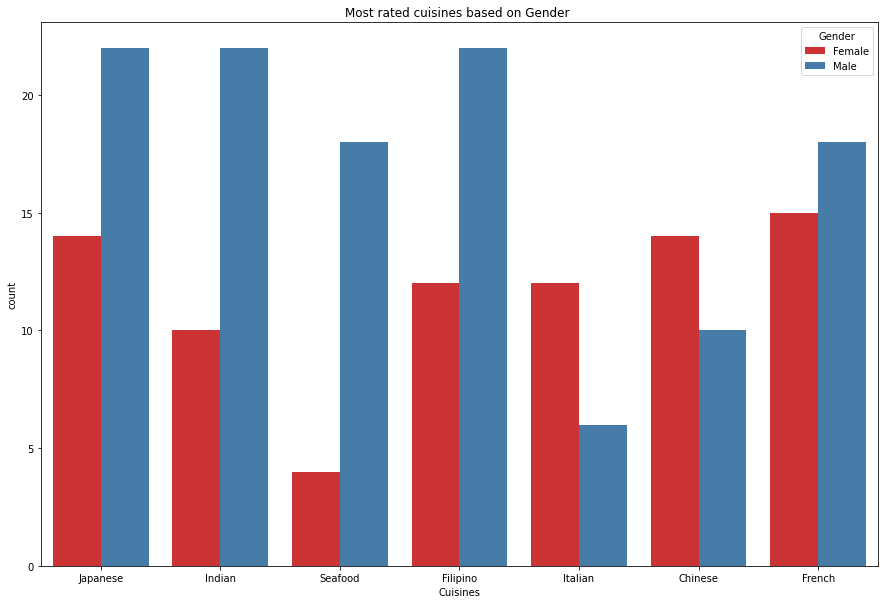

In [30]:
plt.figure(figsize=(15,10))
plt.title('Most rated cuisines based on Gender ')

sns.countplot(x='Cuisines',hue ='Gender',data = df1, palette = 'Set1')
plt.show()

Above bar graph shows that most males preferred japanese, indian and Filipino, whereas french is preferred by females.

<AxesSubplot:xlabel='Food Rating'>

<Figure size 1080x432 with 0 Axes>

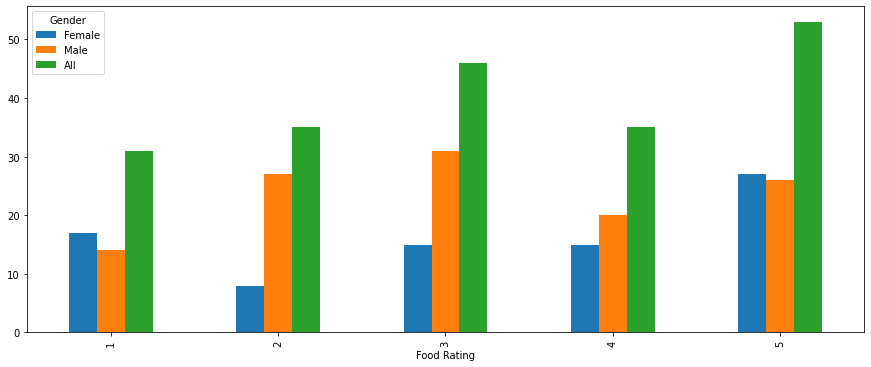

In [31]:
plt.figure(figsize=(15,6))
pd.crosstab(df['Food Rating'], df['Gender'], margins=True).iloc[0:-1].plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='Service Rating'>

<Figure size 1080x432 with 0 Axes>

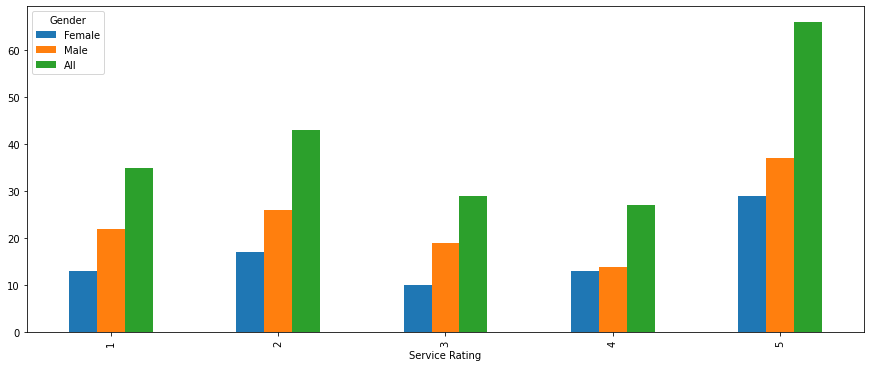

In [32]:
plt.figure(figsize=(15,6))
pd.crosstab(df['Service Rating'], df['Gender'], margins=True).iloc[0:-1].plot(kind='bar',figsize=(15,6))

# Conclusion:


##### -Data is pretty much clean with no null values observerd

##### -By looking at describe table and rating graph it can be seen that mean of rating for food and service is 3.2, customers behaviour on rating mostly depends on the food and service offered by restuarant. By inspecting the graphs it as seen that males are most likely to examine the quality of food and servicce based on which they prefer to rate where as women most preferably give 5* if they like the service and food.  The mean age of customers visiting restuarant are 38 years old.

##### -The most rated cuisine by customers is japanese followed by french and filipino, italian is least preferred.

##### -St. George,NY has the highest number of resturant with 40+ restuarant followed by Upper East Side,NY and Riverdale,NY with 30,28 restuarant respectively.Most customer visits restaurant are students than professional. however, those who have never consumed alcohol are most likely to visit restuarant then who consume socially.Smokers doesn't make any major difference weather they smoke or not the proportion of socially and often smokers are larger.



##### -The most preferred cuisine preferred by males are japanese, indian and filipino whereas chinese and french have slightly less preferred with italian being the least preferred. Females are most likely to eat japanese,french and chinese, and seafoods are least preferred.

In [ ]:
-